### This notebook explains the assumptions of linear regression in detail. One of the most essential steps to take before applying linear regression and depending solely on evaluation metrics is to check for these assumptions.

In [2]:
import pandas as pd
ad_data = pd.read_csv('Advertising.csv', sep=',', header=0)

In [3]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [4]:
ad_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


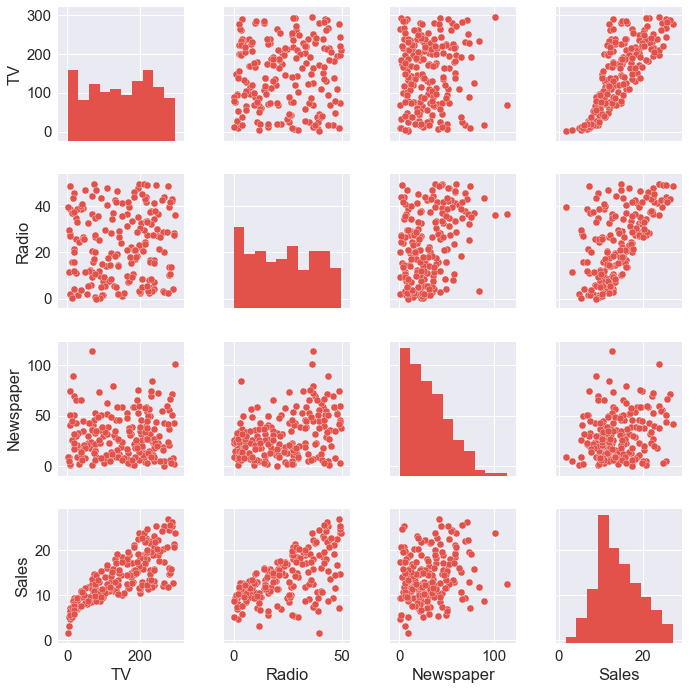

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral",font_scale = 1.5)

p = sns.pairplot(ad_data)
plt.show()

#  Assumptions for Linear Regression

## <a id="linearity">1. Linearity</a>


 ### Linear regression needs the relationship between the independent and dependent variables to be linear.  Let's use a pair plot to check the relation of independent variables with the Sales variable

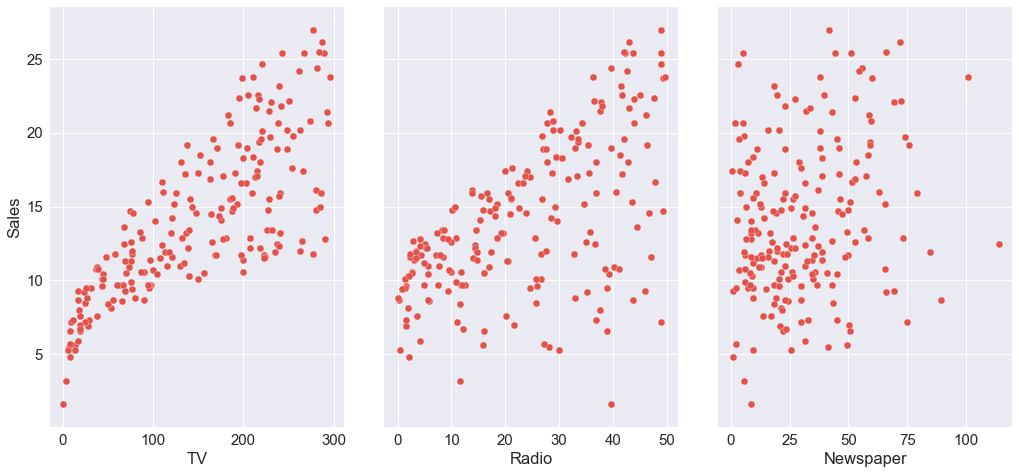

In [9]:
# visualize the relationship between the features and the response using scatterplots
p = sns.pairplot(ad_data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7)
plt.show()

By looking at the plots we can see that with the Sales variable the none of the independent variables form an accurately linear shape but TV and Radio do still better than Newspaper which seems to hardly have any specific shape. So it shows that a linear regression fitting might not be the best model for it. A linear model might not be able to *efficiently* explain the data in terms of variability, prediction accuracy etc. 

A tip is to remember to always see the plots from where the dependent variable is on the y axis. Though it wouldn't vary the shape much but that's how linear regression's intuition is, to put the dependent variable as y and independents as x(s).

### Now rest of the assumptions require us to perform the regression before we can even check for them. So let's perform regression on it.

### Fitting the linear model

In [10]:
x = ad_data.drop(["Sales"],axis=1)
y = ad_data.Sales

### What is Standardization?

---

Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

Here’s the formula for standardization: $$ X' = \frac{(X - \mu)}{\sigma} $$ where $$ \mu, \sigma $$ are the mean and standard deviation of X respectively

### <font color="red"> Food for thought:  </font> What is _normalization_? Is it the same as _standardiation_?

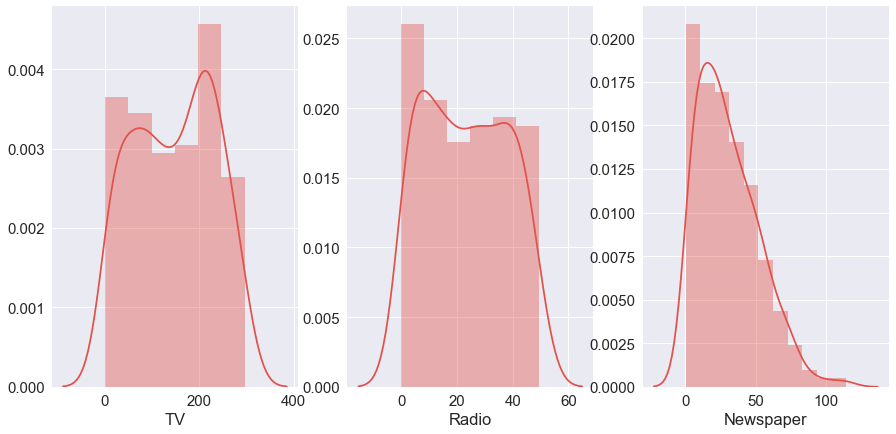

In [55]:
fig, ax = plt.subplots(1,3,figsize=(15,7))
sns.distplot(x['TV'], ax=ax[0])
sns.distplot(x['Radio'], ax=ax[1])
sns.distplot(x['Newspaper'], ax=ax[2])
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [12]:
sc

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
sc.mean_

array([147.0425,  23.264 ,  30.554 ])

In [14]:
sc.var_

array([7334.09514375,  219.325604  ,  471.936784  ])

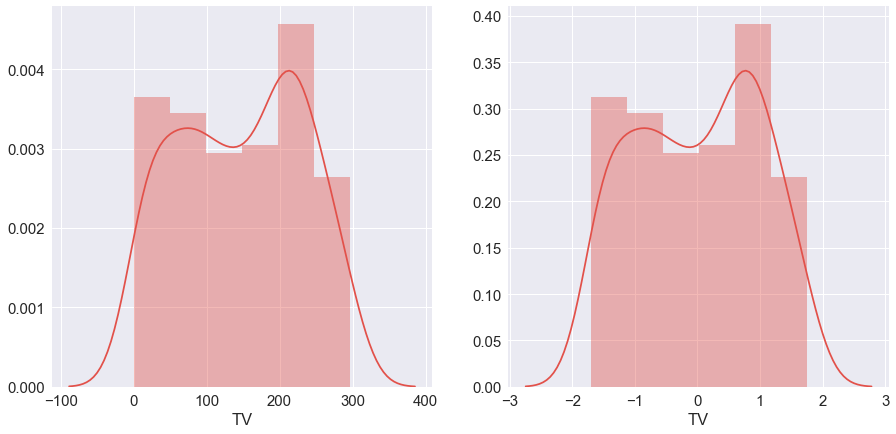

In [21]:
fig, ax = plt.subplots(1,2,figsize=(15,7))
sns.distplot(x['TV'], ax=ax[0])
sns.distplot(pd.DataFrame(X, columns=x.columns)['TV'], ax=ax[1])
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [23]:
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

In [24]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.9072183330817297


In [48]:
regr.intercept_

14.051457996097845

In [49]:
regr.coef_

array([3.78203385, 2.94717399, 0.02525815])

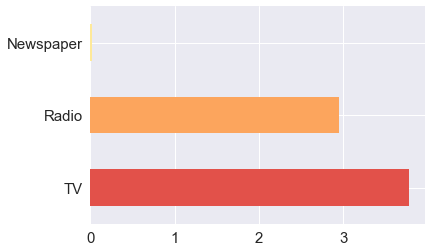

In [52]:
pd.Series(regr.coef_, index=x.columns).plot(kind='barh')
plt.show()

### <font color="red"> Food for thought:  </font> Did we do the correct thing by first transforming and then splitting? Ask yourselves. <font color="red"> Hint:  </font> Data Leakage

## <a id="mean">2. Mean of Residuals</a>

### Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero. So let's find out.


In [26]:
import numpy as np

residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -6.750155989720952e-16


### Very close to zero so all good here. But wait, how about a hypothesis test?

## <a id="homo">3. Check for Homoscedasticity</a>

### Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.

### Detecting heteroscedasticity! 
Graphical Method: Firstly do the regression analysis and then plot the error terms against the predicted values( Yi^). If there is a definite pattern (like linear or quadratic or funnel shaped) obtained from the scatter plot then heteroscedasticity is present.

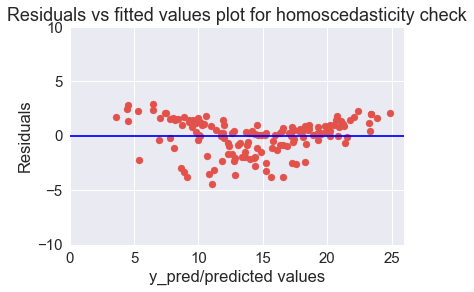

In [32]:
p = plt.scatter(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = plt.axhline(0,color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')
plt.show()

### We could also apply tests. 


Bartlett’s test tests the null hypothesis that all input samples are from populations with equal variances. 

## Alternative
####  Goldfeld Quandt Test
Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.
* Null Hypothesis: Error terms are homoscedastic
* Alternative Hypothesis: Error terms are heteroscedastic.

## <a id="normal">4. Check for Normality of error terms/residuals</a>

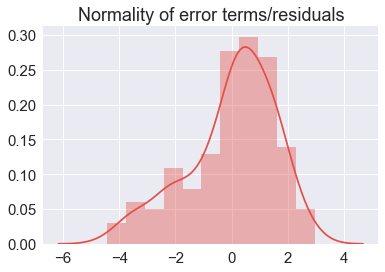

In [35]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.show()

The residual terms are pretty much normally distributed for the number of test points we took. A skew is also visible from the plot. It's very difficult to get perfect curves, distributions in real life data.

## Alternative
####  Shapiro Wilks Test - This sample size. KS Test if larger

## <a id="multico">6. No perfect multicollinearity</a>

In regression, multicollinearity refers to the extent to which independent variables are correlated. Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity.

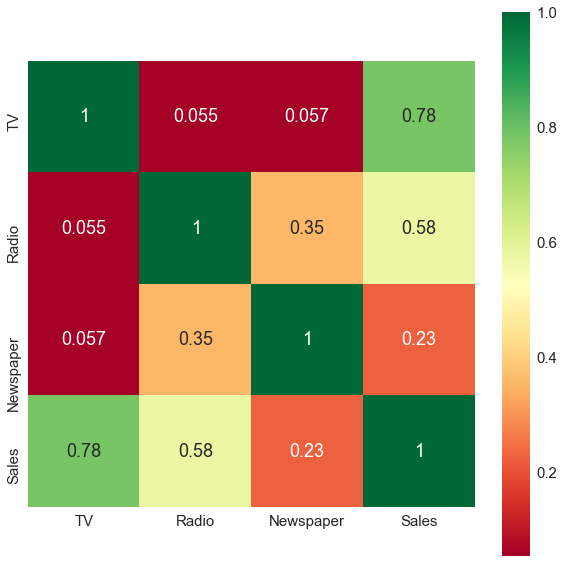

In [46]:
plt.figure(figsize=(10,10))
p=sns.heatmap(ad_data.corr(), annot=True,cmap='RdYlGn',square=True) 
plt.show()

Look for correlation of rows where the dependent variable (Sales in this case) is not involved because if a variable is correlated with the dependent variable then this would be a good sign for our model. Correlation within dependent variables is what we need to look for and avoid. This data doesn't contain perfect multicollinearity among independent variables. In case there was any then we would try to remove one of the correlated variables depending on which was more important to our regression model.

### So most of the major assumptions of Linear Regression are successfully through. Great! Since this was one of the simplest data sets it demonstrated the steps well. These steps can be applied on other problems to be able to make better decisions about which model to use.

### Variance Inflation Factor & Tolerence

In [57]:
import scipy as sp

cc = sp.corrcoef(ad_data[['TV', 'Radio', 'Newspaper']], rowvar=False)
VIF = np.linalg.inv(cc)
VIF.diagonal() ### Higher the value, more the issue. Use cutoff judiciously to eliminate

array([1.00461078, 1.14495192, 1.14518738])

In [58]:
# tolerence
[1./v for v in VIF.diagonal()] ### Lower the value, more the issue. Use cutoff judiciously to eliminate

[0.9954103768257605, 0.8733991227579433, 0.8732195434377649]

## Other assumptions

> * No auto-correlation of residuals

> * Few more

Reference:
* http://r-statistics.co/Assumptions-of-Linear-Regression.html
* https://www.statisticssolutions.com/assumptions-of-linear-regression/

# It's raining feature engineering here!!

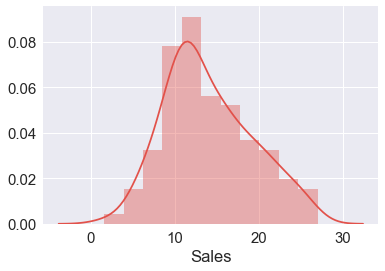

In [59]:
sns.distplot(ad_data['Sales'])
plt.show()

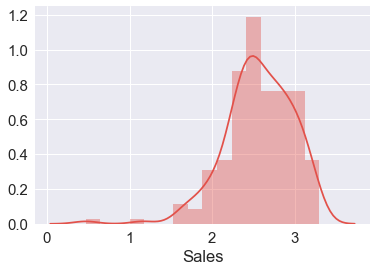

In [60]:
sns.distplot(np.log(ad_data['Sales']))
plt.show()

In [64]:
regr_log = linear_model.LinearRegression()
regr_log.fit(X_train,np.log(y_train))
y_pred_log = np.exp(regr_log.predict(X_train))

In [65]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred_log)))

R squared: 0.9204753787159528
